Implement K-Means clustering on Iris.csv dataset. Determine the number of clusters using the elbow method.
Dataset Link: https://www.kaggle.com/datasets/uciml/iris

   Id  SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm      Species
0   1            5.1           3.5            1.4           0.2  Iris-setosa
1   2            4.9           3.0            1.4           0.2  Iris-setosa
2   3            4.7           3.2            1.3           0.2  Iris-setosa
3   4            4.6           3.1            1.5           0.2  Iris-setosa
4   5            5.0           3.6            1.4           0.2  Iris-setosa
[600.0, 223.73200573676348, 140.96581663074699, 114.38954350297054, 91.00244098567246, 80.24972235577131, 71.8094621471561, 62.64100835118803, 54.25747690371483, 49.95882837219003]


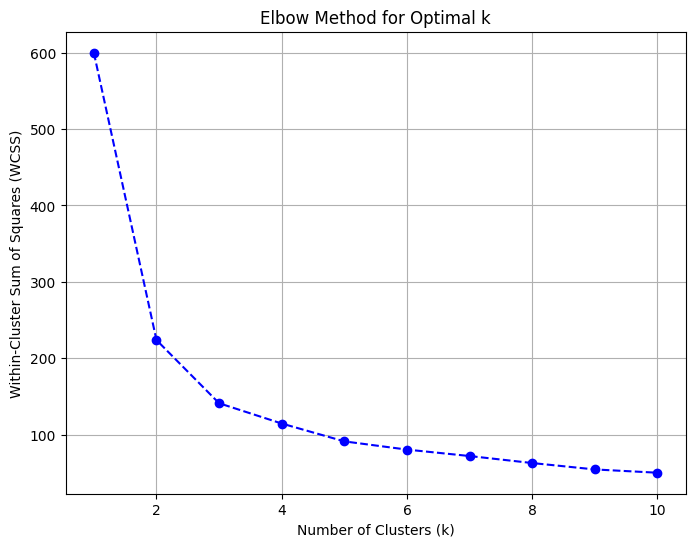

C:\Users\HP\AppData\Roaming\Python\Python311\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


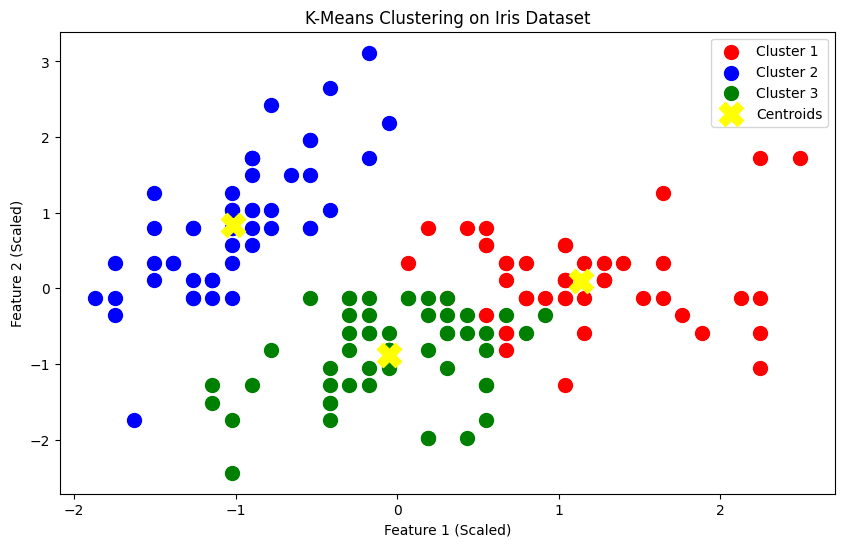

In [ ]:
# Step 1: Import necessary libraries
import pandas as pd  # For data handling and manipulation
import numpy as np  # For numerical operations
import matplotlib.pyplot as plt  # For plotting data and visualizations
from sklearn.cluster import KMeans  # For applying K-Means clustering
from sklearn.preprocessing import StandardScaler  # For scaling data

# Explanation:
# - `pandas` is used to load and handle the dataset.
# - `numpy` provides support for numerical operations, though it is optional in this case.
# - `matplotlib.pyplot` helps visualize data (plotting graphs).
# - `KMeans` from sklearn is used for performing K-Means clustering.
# - `StandardScaler` is used to scale the features for better clustering performance.

# Step 2: Load the Iris dataset 
data = pd.read_csv("Iris.csv")  # Load dataset from the file 'Iris.csv'
print(data.head())  # Display the first few rows to understand the dataset's structure

# Explanation:
# - `pd.read_csv` reads the CSV file and converts it into a DataFrame (tabular structure).
# - `data.head()` prints the first few rows to help us quickly inspect the dataset.

# Step 3: Data Preprocessing
# Remove unnecessary columns and separate features from labels
X = data.drop(['Id', 'Species'], axis=1)  # Drop 'Id' and 'Species' as they are not used for clustering

# Explanation:
# - `drop(['Id', 'Species'], axis=1)`: Removes columns 'Id' (irrelevant) and 'Species' (labels).
# - Clustering is unsupervised; we do not use labels ('Species') in the process.

# Step 4: Standardize the data (scaling)
scaler = StandardScaler()  # Initialize StandardScaler to standardize the features
X_scaled = scaler.fit_transform(X)  # Scale features for consistent clustering performance

# Explanation:
# - `StandardScaler`: Standardizes features by removing the mean and scaling to unit variance.
# - `fit_transform`: Fits the scaler to the data and transforms it (returns standardized values).
# - Standardizing is essential for K-Means to balance each feature equally during clustering.

# Step 5: Determine the optimal number of clusters using the elbow method
wcss = []  # Initialize an empty list to store Within-Cluster Sum of Squares (WCSS)

# Explanation:
# - `wcss`: WCSS measures the total distance between points and their respective cluster centers.
# - We aim to minimize WCSS for a better clustering result.
# - The elbow method helps in identifying the optimal number of clusters by observing WCSS drop.

# Step 6: Calculate WCSS for different numbers of clusters
for i in range(1, 11):  # Loop over cluster numbers from 1 to 10
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=42)
    kmeans.fit(X_scaled)  # Fit K-Means to scaled data
    # kmeans.inertia_ -> sum of squared distances to the nearest centroid
    wcss.append(kmeans.inertia_)  # Append WCSS value (inertia_) for each number of clusters

# n_clusters=i: This sets the number of clusters we want to form. In this case,
#  i is a variable, likely part of a loop, meaning we’re trying different numbers of clusters
#  (e.g., 1, 2, 3, etc.) to see which one works best.


# init='k-means++': This initialization method helps to place the initial cluster centers in a way that
#  improves clustering results and speeds up the algorithm. The 'k-means++' option helps in avoiding 
# random placements that could result in poor clustering.


# n_init=10: This means the algorithm will try 10 different initial placements for the cluster centers and
#  choose the best one, which improves clustering reliability.


# Explanation:
# - `n_clusters=i`: Specifies the number of clusters for each iteration.
# - `init='k-means++'`: Improves centroid initialization for faster convergence.
# - `max_iter=300`: Sets a maximum iteration limit to ensure convergence.
# - `n_init=10`: Runs the K-Means algorithm with different centroid seeds and selects the best output.
# - `inertia_`: Returns the WCSS value (sum of squared distances to the nearest centroid).

print(wcss)

# Step 7: Plotting the Elbow Curve
plt.figure(figsize=(8, 6))
# range(1,11) means 1 to 10 because we have looped over 1 to 10 number of cluster 
# this is plotting curve number of cluters and its sum of squared distances to the nearest centroid
plt.plot(range(1, 11), wcss, marker='o', linestyle='--', color='b') 
plt.title('Elbow Method for Optimal k')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Within-Cluster Sum of Squares (WCSS)')
plt.grid()
plt.show()

# Explanation:
# - The plot shows WCSS vs. the number of clusters.
# - The "elbow" in the graph (where WCSS starts decreasing slowly) suggests the optimal number of clusters.



# Step 8: Applying K-Means with the chosen number of clusters (k=3 based on elbow method observation)

# "elbow" in the curve (where the line bends and WCSS begins to decrease more slowly) is considered the optimal number of clusters.
# so in over diagram which we plot above show bend at 3
# so we took number of cluster as 2
kmeans = KMeans(n_clusters=3, init='k-means++', random_state=42)  # Using 3 clusters as determined by the elbow method
y_kmeans = kmeans.fit_predict(X_scaled)  # Fit K-Means and predict cluster labels

# Explanation:
# - `fit_predict`: Fits the model and assigns each data point to a cluster.
# - `y_kmeans` stores the predicted cluster labels for each data point.



# Step 9: Visualize the Clusters
# Scatter plot for clusters based on the first two features for visualization
plt.figure(figsize=(10, 6))

plt.scatter(X_scaled[y_kmeans == 0, 0], X_scaled[y_kmeans == 0, 1], s=100, c='red', label='Cluster 1')
# X_scaled[y_kmeans == 0, 0], X_scaled[y_kmeans == 0, 1]
# this means y_kmeans == 0 , 0 first zero is for cluters number and second zero for x coordinate 
# y_kmeans == 0, 1 first zero is for cluster number and second 1 is for y coordinates 
plt.scatter(X_scaled[y_kmeans == 1, 0], X_scaled[y_kmeans == 1, 1], s=100, c='blue', label='Cluster 2')
plt.scatter(X_scaled[y_kmeans == 2, 0], X_scaled[y_kmeans == 2, 1], s=100, c='green', label='Cluster 3')
# It plots the points in Cluster 1 (where y_kmeans == 0), using their x and y coordinates.
# The points are shown in red for Cluster 1.




# Plotting centroids of clusters
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=300, c='yellow', marker='X', label='Centroids')
# kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], coordinated for clusters
# kmeans.cluster_centers_[:, 0] : array([ 1.13597027, -1.01457897, -0.05021989])
# kmeans.cluster_centers_[:, 1] : array([ 0.09659843,  0.84230679, -0.88029181])
plt.title('K-Means Clustering on Iris Dataset')
plt.xlabel('Feature 1 (Scaled)')
plt.ylabel('Feature 2 (Scaled)')
plt.legend()
plt.show()

# Explanation:
# - Each color represents a different cluster, with centroids marked by yellow 'X'.
# - This visualization shows how data points are grouped into clusters based on similarity.

# plt.scatter(X_scaled[y_kmeans == 0, 0], X_scaled[y_kmeans == 0, 1], s=100, c='red', label='Cluster 1'):

# Plots Cluster 1 (points where y_kmeans == 0).
# X_scaled[y_kmeans == 0, 0]: x-coordinates (first feature).
# X_scaled[y_kmeans == 0, 1]: y-coordinates (second feature).
# Plots these points in red with the label 'Cluster 1'.
# plt.scatter(X_scaled[y_kmeans == 1, 0], X_scaled[y_kmeans == 1, 1], s=100, c='blue', label='Cluster 2'):

# Plots Cluster 2 (points where y_kmeans == 1).
# Similar logic for selecting x and y coordinates.
# Plots these points in blue with the label 'Cluster 2'.
# plt.scatter(X_scaled[y_kmeans == 2, 0], X_scaled[y_kmeans == 2, 1], s=100, c='green', label='Cluster 3'):

# Plots Cluster 3 (points where y_kmeans == 2).
# Plots these points in green with the label 'Cluster 3'.


In [ ]:
# Explanation of Each Step:
# Import Libraries: Import pandas for data handling, numpy for numerical operations, matplotlib for plotting, KMeans from sklearn.cluster for clustering, and StandardScaler for scaling.

# Load Dataset: Load and display the dataset's first few rows to check its structure.

# Data Preprocessing: Drop irrelevant columns and separate features from labels. Here, Species and Id are removed because Species is not used in unsupervised clustering, and Id is just an index.

# Standardize the Data: Standardization (scaling) ensures each feature contributes equally to clustering by removing the mean and scaling to unit variance. This step often improves the performance of K-Means.

# Determine Optimal Clusters (Elbow Method):

# The elbow method helps determine the best number of clusters by plotting WCSS for different values of k.
# As k increases, WCSS decreases because clusters get smaller.
# The "elbow" point, where WCSS levels off, indicates the optimal k.
# Plot Elbow Curve: Plot WCSS values against k values. The point where the curve forms an "elbow" indicates the best number of clusters.

# Apply K-Means Clustering with Optimal k: Use the elbow method’s optimal k (often k=3 for the Iris dataset) to create the final model. Assign cluster labels using fit_predict.

# Visualize Clusters: Plot the clusters using the first two features for simplicity.

In [11]:
kmeans.cluster_centers_[:, 0]

array([ 1.13597027, -1.01457897, -0.05021989])

In [13]:
kmeans.cluster_centers_[:, 1]

array([ 0.09659843,  0.84230679, -0.88029181])

array([1.40150837, 0.67450115, 1.2803405 , 0.55333328, 1.03800476,
       0.06866179, 0.91683689, 1.15917263, 1.03800476, 0.18982966,
       1.03800476, 0.55333328, 1.52267624, 0.55333328, 0.79566902,
       2.12851559, 1.76501198, 1.03800476, 1.64384411, 0.79566902,
       0.67450115, 1.15917263, 0.67450115, 0.79566902, 2.24968346,
       2.24968346, 1.2803405 , 2.24968346, 1.03800476, 1.64384411,
       0.31099753, 0.67450115, 1.64384411, 1.88617985, 2.4920192 ,
       0.67450115, 2.24968346, 0.55333328, 0.67450115, 1.2803405 ,
       1.03800476, 1.2803405 , 1.15917263, 1.03800476, 1.03800476,
       0.79566902, 0.4321654 ])